In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Transfer & EDA

In [35]:
#load data from csv to dataframe
cust_data = pd.read_csv('archive/Mall_customers.csv')

In [36]:
#first 5 rows
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
#finding the rows and columns
cust_data.shape

(200, 5)

In [38]:
#information of dataset
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
#checking for null values
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

our dataset has no null values, let us process it now

Let us consider just two columns Annual Income & Spending Score

In [40]:
X = cust_data.iloc[:, [3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Choose no of clusters in our data, We will use WCSS - Within Clusters Sum of Squares

In [41]:
wcss = []

for i in range(1,11):
    k = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    k.fit(X)
    
    wcss.append(k.inertia_)

C:\Users\chhab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chhab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chhab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chhab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

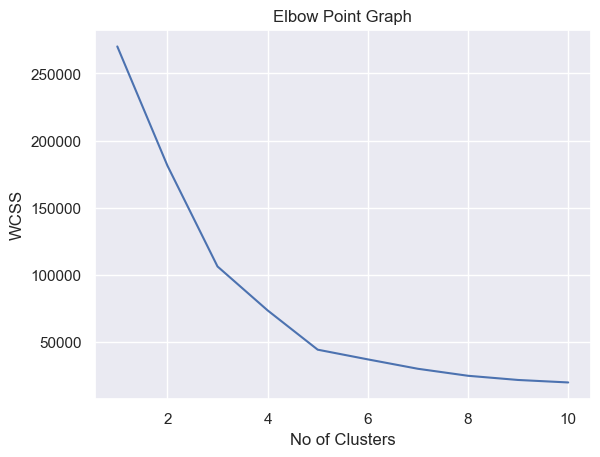

In [42]:
#plot elbox graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method is a technique for choosing the right number of clusters (K) in K-means clustering. It works by running K-means with different K values and calculating the sum of squared errors (SSE), which measures how well data points fit their cluster centroids. As we increase K, SSE generally decreases, but it reaches a point where the decrease slows down—the "elbow point." This point on a plot of K against SSE indicates the optimal K value, balancing data fit and model simplicity.

Optimum Number of Clusters = 5

Train Model

In [43]:
k = KMeans(n_clusters = 5, init='k-means++', random_state = 0)

#return a label 
Y = k.fit_predict(X)

print(Y)

C:\Users\chhab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chhab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 clusters - 0,1,2,3,4,5

Let's visualize

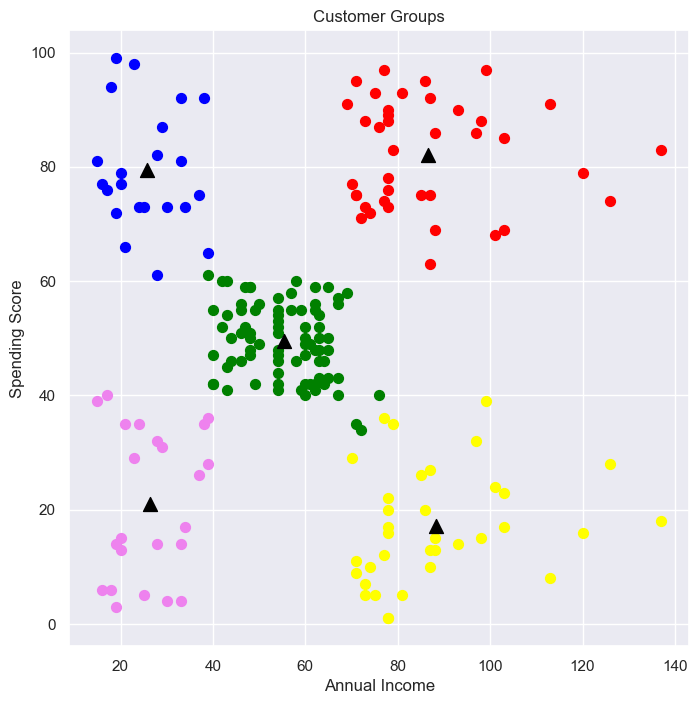

In [44]:
#plot

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c = 'violet', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c = 'blue', label = 'Cluster 5')


#plot the centroids
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s=100, c='black', label = 'Centroids', marker='^')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Assessing the quality of clustering results differs from classification because it doesn't rely on labeled data. Instead, it evaluates how well data is grouped based solely on the data's inherent structure. Moreover, in clustering, we often lack true labels for observations.

Two main categories of metrics exist: external and internal. External metrics leverage known ground-truth information about data splits, whereas internal metrics solely depend on the data itself and measure the quality of clusters without external references. Typically, the optimal number of clusters is determined using internal metrics, as they help identify the most suitable clustering structure based on the data's inherent characteristics.

In [45]:
#DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 4, min_samples = 3)

In [47]:
model_dbscan = dbscan.fit(X)

In [48]:
labels = model_dbscan.labels_
labels

array([-1, -1,  1,  0, -1,  0,  1, -1,  1, -1,  2, -1,  2,  0,  2,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1,  3, -1,  3, -1, -1, -1,  4, -1,  4,  5,  5,  5,  5,  5,
        4,  5,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5, -1,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6, -1, -1,  7, -1, -1,  8,  7,  8,  7, -1,  7,  8,  9,
        8,  7,  8,  7,  8, -1, -1,  9,  8, -1, -1,  7, 10,  9, 10,  9, 10,
        7, 10,  9, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [49]:
from sklearn import metrics

sample_cores = np.zeros_like(labels, dtype = bool)
sample_cores[dbscan.core_sample_indices_] = True


In [50]:
n_custer = len(set(labels))-(1 if -1 in labels else 0)
n_custer

12

In [51]:
print(metrics.silhouette_score(X,labels))

0.013108286404496931


# Heirarchical Clustering

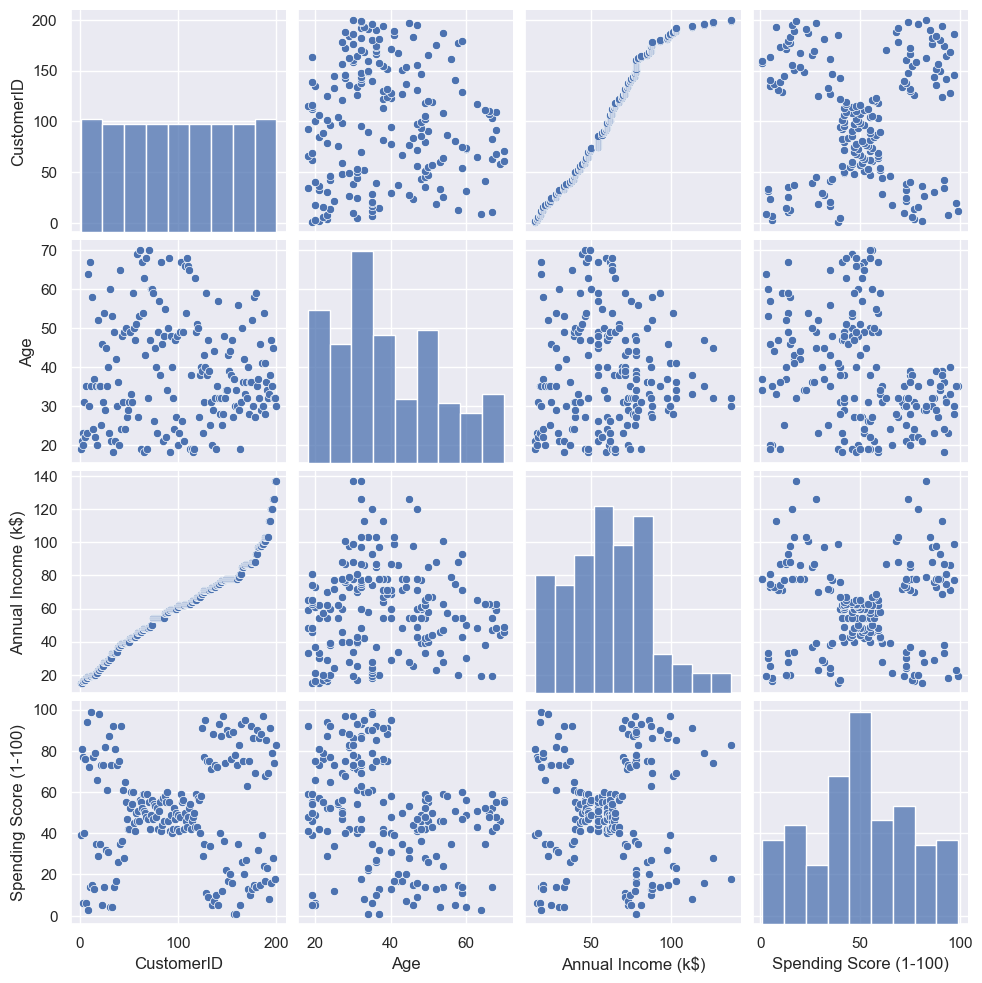

In [52]:
sns.pairplot(cust_data)

In [53]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


No specific segmentation using customer id

In [54]:
cust_data.drop(['CustomerID'] , axis = 1, inplace = True)

In [55]:
cust_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


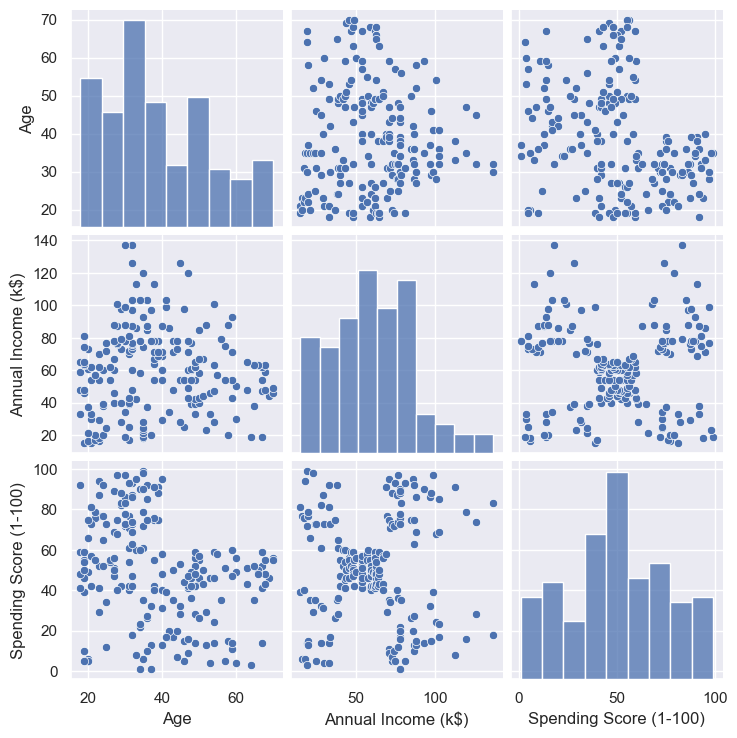

In [56]:
sns.pairplot(cust_data)

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cust_data['Gender'] = label_encoder.fit_transform(cust_data['Gender'])
data_scaled = cust_data


In [58]:
# from sklearn.preprocessing import normalize
# data_scaled = normalize(cust_data)
# data_scaled = pd.DataFrame(data_scaled, columns=cust_data.columns)
# data_scaled.head()

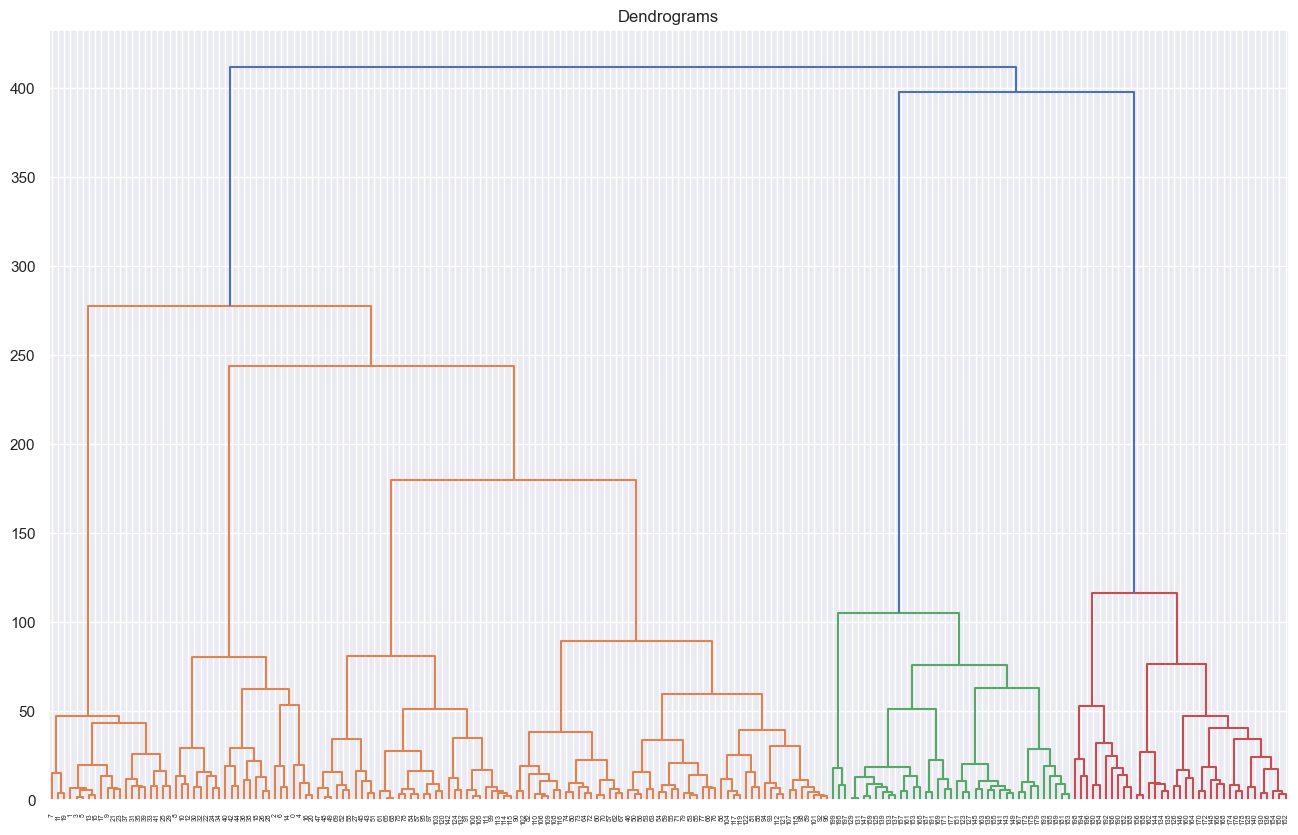

In [59]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

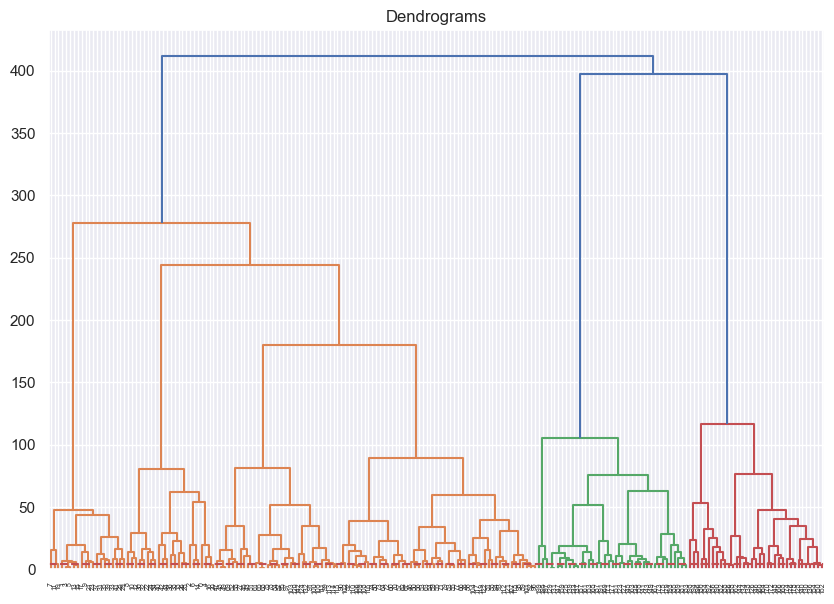

In [60]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

C:\Users\chhab\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

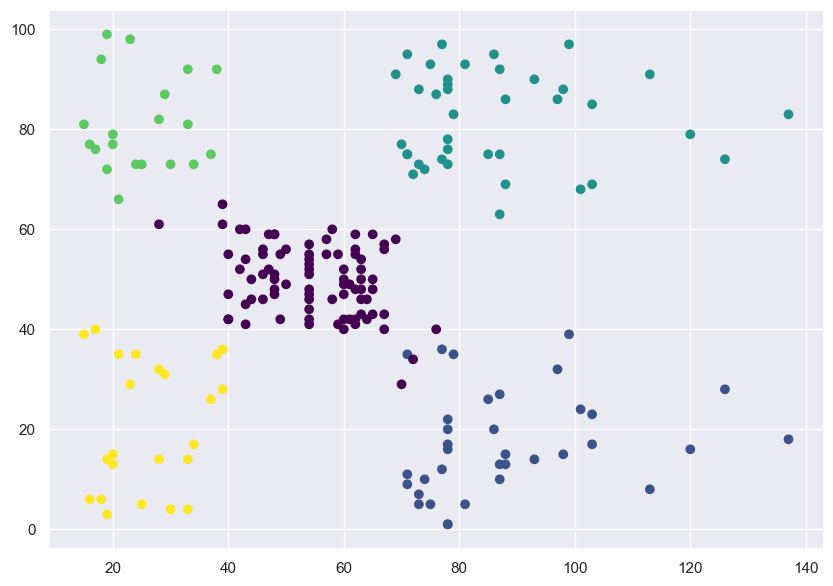

In [68]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_, alpha = 1, cmap='viridis') 